In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)
image_path = f"../datasets/images"

In [2]:
scaled_df = pd.read_csv('../datasets/final_dataset/cyclic_scaled_data.csv')
scaled_df.head()

,latitude,longitude,depth,magnitude,magnitude_type,distance,gravity,force,year,day_name,month_sin,month_cos,hour_sin,hour_cos,minutes_sin,minutes_cos
0,0.578374,0.576498,-0.804832,4.10,0.0,1.205836,0.254693,-1.166843,2024,5.0,-0.5,-0.866025,-0.707107,0.707107,-0.913545,-0.406737
1,-0.092464,-0.276457,-0.242839,2.50,0.0,0.654375,-0.849625,-0.680270,2024,5.0,-0.5,-0.866025,-0.707107,0.707107,0.866025,0.500000
2,1.319964,-0.969834,1.611773,3.60,0.0,0.917097,1.719603,-0.915982,2024,5.0,-0.5,-0.866025,-0.965926,0.258819,-0.669131,0.743145
3,0.440801,0.967439,-0.613616,4.00,0.0,1.251187,-0.008240,-1.205488,2024,5.0,-0.5,-0.866025,-0.965926,0.258819,0.951057,-0.309017
4,0.353824,-0.675245,-0.672620,2.72,0.0,0.781542,-0.173512,-0.795270,2024,5.0,-0.5,-0.866025,-0.965926,0.258819,0.743145,0.669131


In [3]:
# drop target variable (i.e magnitude)
X = scaled_df.drop(columns=['magnitude'], axis=1)
y = scaled_df['magnitude']

In [4]:
X.isnull().sum()

latitude          0
longitude         0
depth             0
magnitude_type    0
distance          0
gravity           0
force             0
year              0
day_name          0
month_sin         0
month_cos         0
hour_sin          0
hour_cos          0
minutes_sin       0
minutes_cos       0
dtype: int64

## Apply Feature Selection

### 1. Correlation

In [5]:
corr = X.select_dtypes(exclude=object).corr()

In [6]:
corr

,latitude,longitude,depth,magnitude_type,distance,gravity,force,year,day_name,month_sin,month_cos,hour_sin,hour_cos,minutes_sin,minutes_cos
latitude,1.000000,-0.305316,-0.056648,-0.189650,0.006645,0.527984,-0.008155,0.016664,0.002193,0.008409,0.005524,0.013956,-0.003330,-0.002790,-0.000100
longitude,-0.305316,1.000000,0.174396,0.154237,-0.007795,-0.372638,0.007388,-0.082991,0.002722,0.047383,0.056130,-0.025758,0.008100,0.001032,-0.003234
depth,-0.056648,0.174396,1.000000,-0.001072,0.005133,-0.050951,-0.005598,-0.070032,-0.001261,0.003983,0.050166,-0.001464,0.005510,-0.002742,-0.000286
magnitude_type,-0.189650,0.154237,-0.001072,1.000000,-0.001930,-0.079155,0.001653,-0.029876,-0.000958,0.017243,0.018207,-0.008438,0.003708,0.003054,0.001933
distance,0.006645,-0.007795,0.005133,-0.001930,1.000000,-0.005448,-0.998529,0.004070,0.006504,0.016990,0.004052,-0.001880,-0.001218,-0.004640,0.001126
gravity,0.527984,-0.372638,-0.050951,-0.079155,-0.005448,1.000000,0.003501,0.020543,-0.000868,-0.020662,0.033814,0.001241,-0.002886,-0.000968,0.000794
force,-0.008155,0.007388,-0.005598,0.001653,-0.998529,0.003501,1.000000,-0.004250,-0.006520,-0.016879,-0.004448,0.001813,0.002101,0.004702,-0.000971
year,0.016664,-0.082991,-0.070032,-0.029876,0.004070,0.020543,-0.004250,1.000000,0.011359,0.038558,0.001083,0.009036,0.005667,-0.002165,0.000436
day_name,0.002193,0.002722,-0.001261,-0.000958,0.006504,-0.000868,-0.006520,0.011359,1.000000,0.004611,0.017036,0.005607,-0.000944,-0.000269,0.000598
month_sin,0.008409,0.047383,0.003983,0.017243,0.016990,-0.020662,-0.016879,0.038558,0.004611,1.000000,0.023327,-0.005387,-0.008636,-0.000447,0.001071


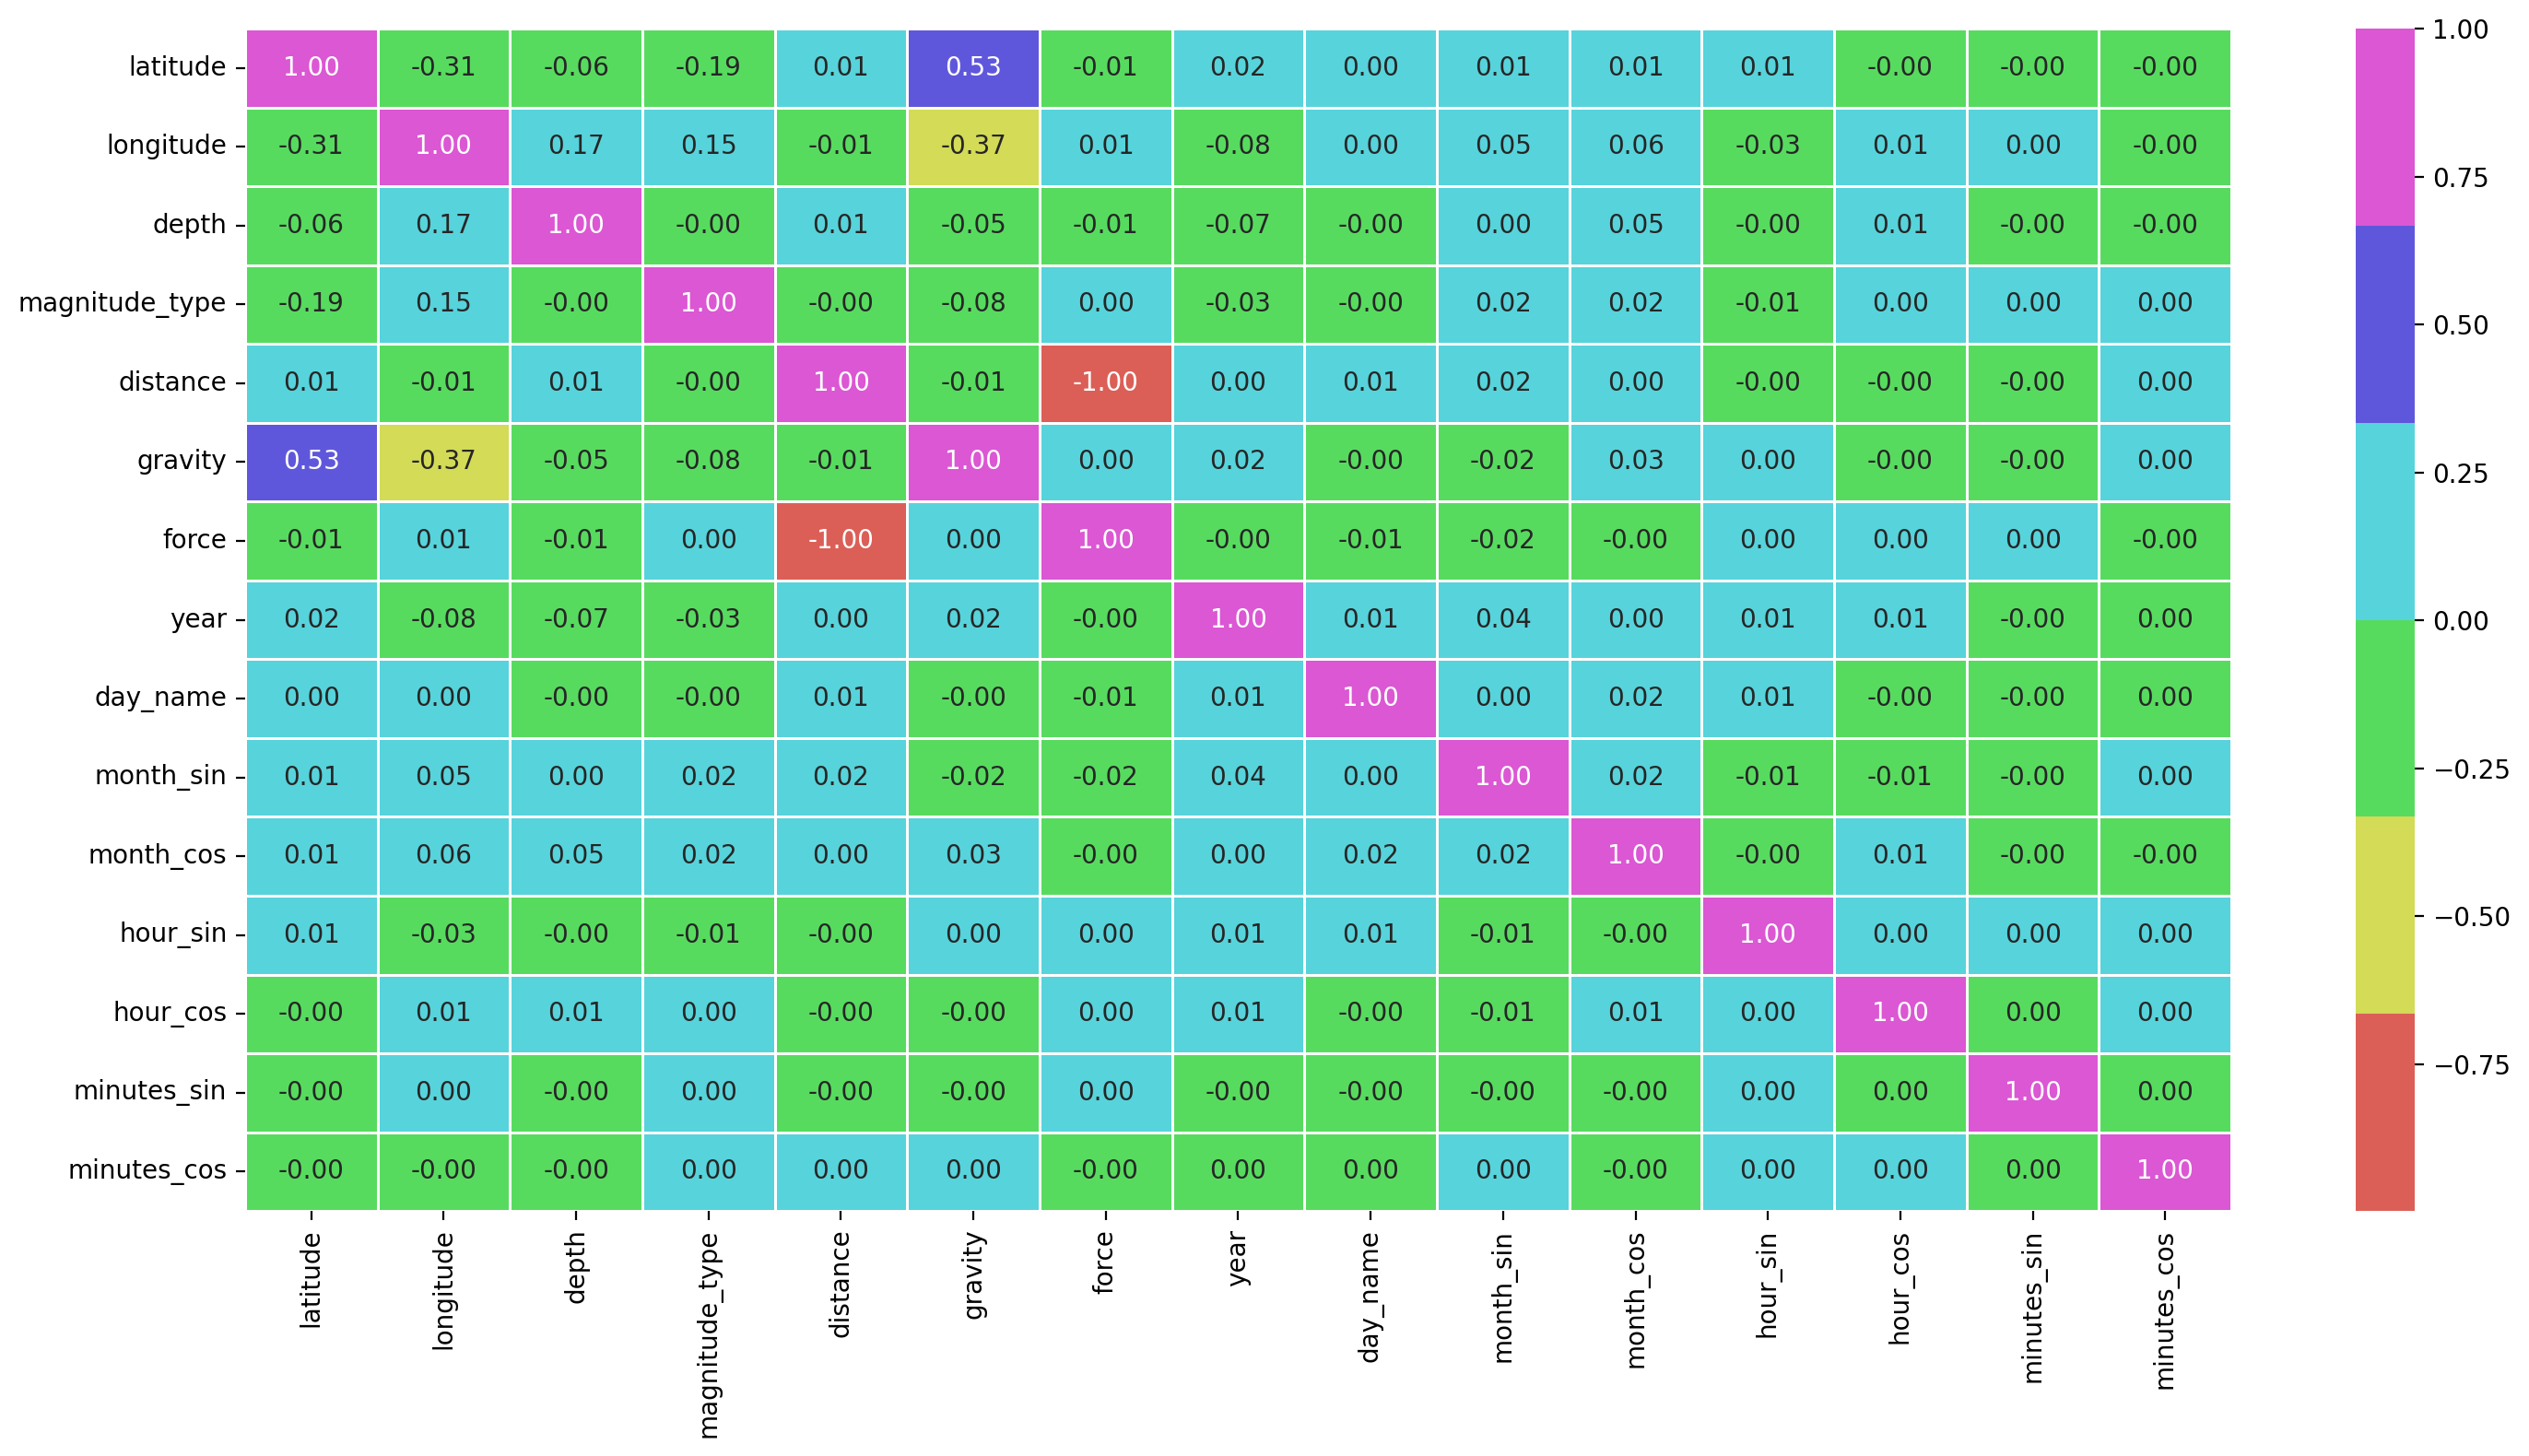

In [7]:
plt.figure(figsize=(15, 8), dpi = 200)
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, cmap=sns.color_palette('hls'))
plt.tight_layout()
plt.savefig(f'{image_path}/corelation_matrix.png')
plt.show()

### 2. SelectFromModel and Lasso

#### First, specify the Lasso Regression model, and select a suitable alpha (equivalent of penalty).
#### The bigger the alpha the less features that will be selected.
    - Then use the selectFromModel object from sklearn, which will select the features which coefficients are non-zero

In [8]:
# remember to set the seed, the random state in this function it should be same for testing dataset
feature_sel_model_lasso = SelectFromModel(Lasso(alpha=0.005, random_state=0)) 
feature_sel_model_lasso.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [9]:
feature_sel_model_lasso.get_support()

array([ True,  True,  True,  True, False,  True, False,  True, False,
        True,  True,  True, False, False, False])

In [10]:
# let's print the number of total and selected features
# this is how we can make a list of the selected features
selected_feat_lasso = X.columns[(feature_sel_model_lasso.get_support())]

# lasso_fitted = feature_sel_model_lasso.estimator_

print('Total features: {}'.format((X.shape[1])))
print('Selected features: {}'.format(len(selected_feat_lasso)))

Total features: 15
Selected features: 9


#### Selected Feature

In [11]:
Selected_feature_lasso = X[selected_feat_lasso]
Selected_feature_lasso.head()

,latitude,longitude,depth,magnitude_type,gravity,year,month_sin,month_cos,hour_sin
0,0.578374,0.576498,-0.804832,0.0,0.254693,2024,-0.5,-0.866025,-0.707107
1,-0.092464,-0.276457,-0.242839,0.0,-0.849625,2024,-0.5,-0.866025,-0.707107
2,1.319964,-0.969834,1.611773,0.0,1.719603,2024,-0.5,-0.866025,-0.965926
3,0.440801,0.967439,-0.613616,0.0,-0.008240,2024,-0.5,-0.866025,-0.965926
4,0.353824,-0.675245,-0.672620,0.0,-0.173512,2024,-0.5,-0.866025,-0.965926


#### Not Selected Feature

In [12]:
Not_selected_feature_lasso = X.columns[~(feature_sel_model_lasso.get_support())]
Not_selected_feature_lasso

Index(['distance', 'force', 'day_name', 'hour_cos', 'minutes_sin',
       'minutes_cos'],
      dtype='object')

### 3. Feature Selection Using Information Gain For Regression

In [13]:
from sklearn.feature_selection import mutual_info_regression

# determine the mutual information
mutual_info = mutual_info_regression(X, y)
mutual_info

array([6.07526469e-01, 7.28635901e-01, 2.92803300e-01, 2.67472328e-01,
       5.23731297e-03, 4.85684711e-01, 5.19790339e-03, 5.66591361e-02,
       6.37247809e-04, 6.62730506e-03, 1.15351115e-02, 3.64352922e-03,
       3.27198014e-03, 0.00000000e+00, 0.00000000e+00])

In [14]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

longitude         0.728636
latitude          0.607526
gravity           0.485685
depth             0.292803
magnitude_type    0.267472
year              0.056659
month_cos         0.011535
month_sin         0.006627
distance          0.005237
force             0.005198
hour_sin          0.003644
hour_cos          0.003272
day_name          0.000637
minutes_sin       0.000000
minutes_cos       0.000000
dtype: float64

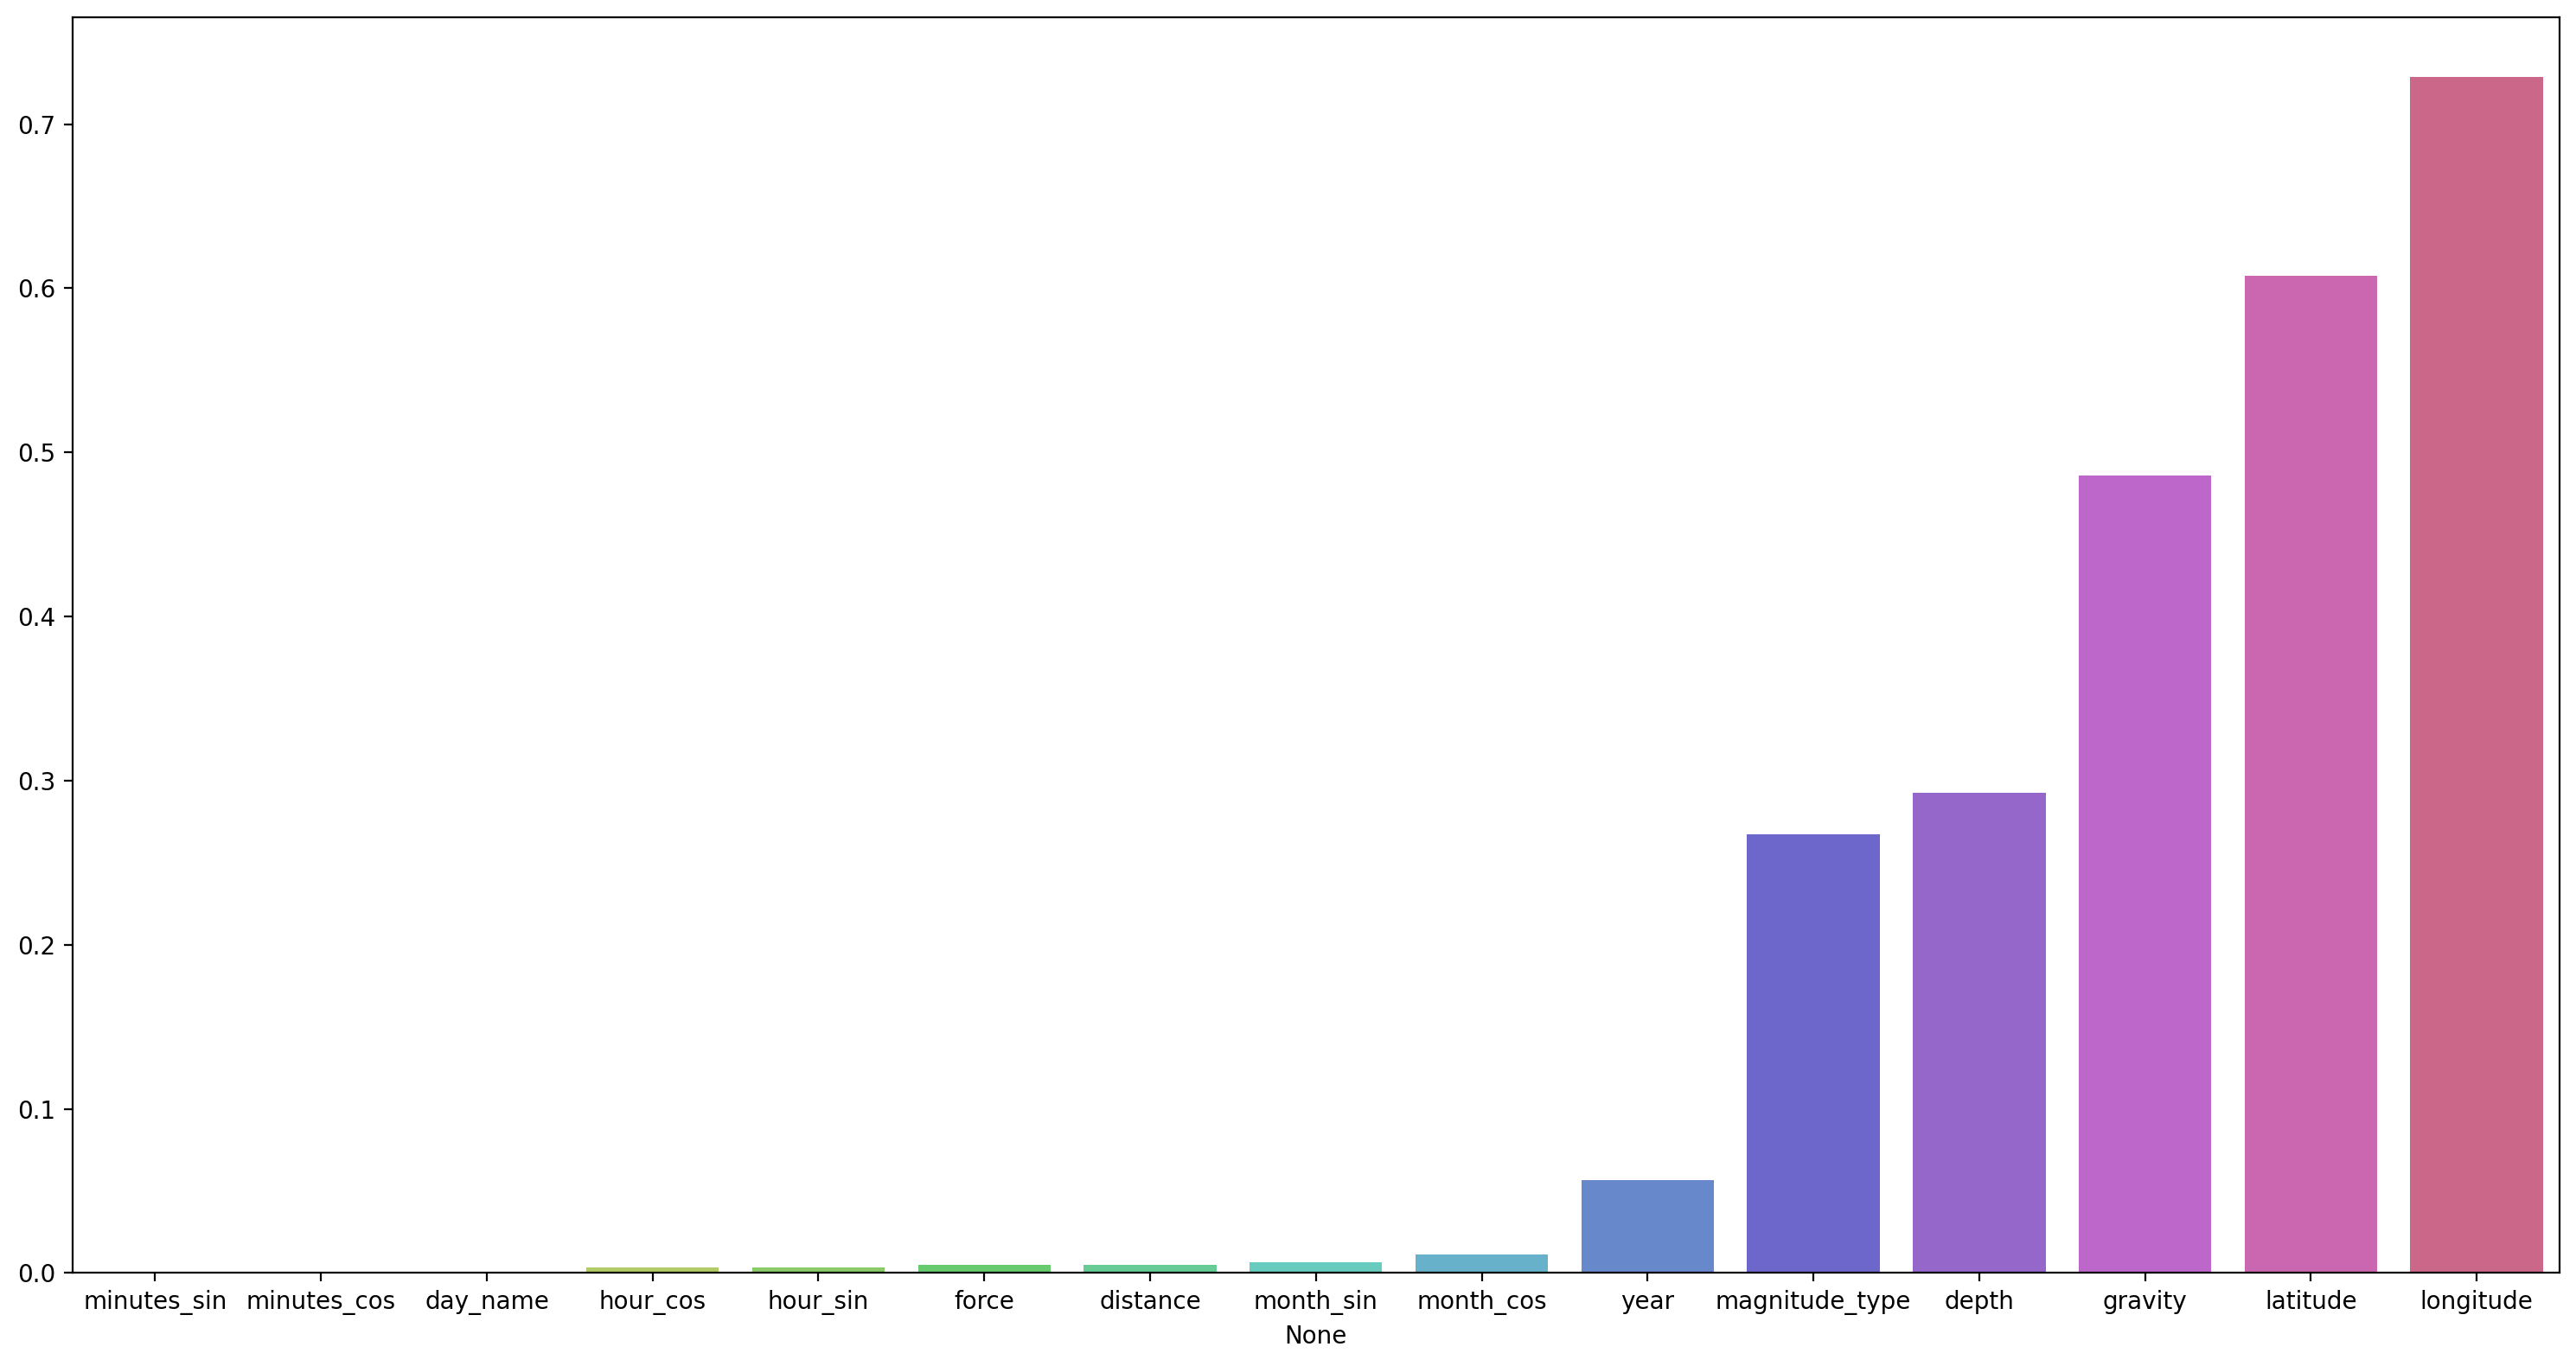

In [15]:
# mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))
mutual_info = mutual_info.sort_values(ascending=True)
plt.figure(figsize=(15, 8), dpi = 200)
sns.barplot(x = mutual_info.index,
            y = mutual_info.values,
            palette=sns.color_palette('hls', n_colors=len(mutual_info)), 
            hue=mutual_info.index)
plt.tight_layout()
plt.savefig(f'{image_path}/feature_selection_mutual_info.png')
plt.show()

### 5. ANOVA OR F-Test

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [17]:
"""
f_regression()
Univariate linear regression tests.

Linear model for testing the individual effect of each of many regressors.
This is a scoring function to be used in a feature selection procedure, not
a free standing feature selection procedure.

This is done in 2 steps:

1. The correlation between each regressor and the target is computed,
   that is, ((X[:, i] - mean(X[:, i])) * (y - mean_y)) / (std(X[:, i]) *
   std(y)).
2. It is converted to an F score then to a p-value.
"""

'\nf_regression()\nUnivariate linear regression tests.\n\nLinear model for testing the individual effect of each of many regressors.\nThis is a scoring function to be used in a feature selection procedure, not\na free standing feature selection procedure.\n\nThis is done in 2 steps:\n\n1. The correlation between each regressor and the target is computed,\n   that is, ((X[:, i] - mean(X[:, i])) * (y - mean_y)) / (std(X[:, i]) *\n   std(y)).\n2. It is converted to an F score then to a p-value.\n'

In [18]:
feature_selector = SelectKBest(score_func=f_regression, k=10) # k is the number of features to be selected
# Apply feature selection
X_new = feature_selector.fit(X, y)

In [19]:
features_score = pd.DataFrame(X_new.scores_)
features_pvalue = pd.DataFrame(np.round(X_new.pvalues_,4))
features = pd.DataFrame(X.columns)
feature_score = pd.concat([features,features_score,features_pvalue],axis=1)
# Assign the column name
feature_score.columns = ["Input_Features","F_Score","P_Value"]
print(feature_score.nlargest(10, columns="F_Score"))

    Input_Features        F_Score  P_Value
1        longitude  173383.496751   0.0000
0         latitude  126700.500054   0.0000
3   magnitude_type   88147.399079   0.0000
5          gravity   31558.253417   0.0000
2            depth    5850.815270   0.0000
7             year    1767.923985   0.0000
10       month_cos    1182.282809   0.0000
11        hour_sin     388.746503   0.0000
9        month_sin     370.632963   0.0000
4         distance      16.345077   0.0001


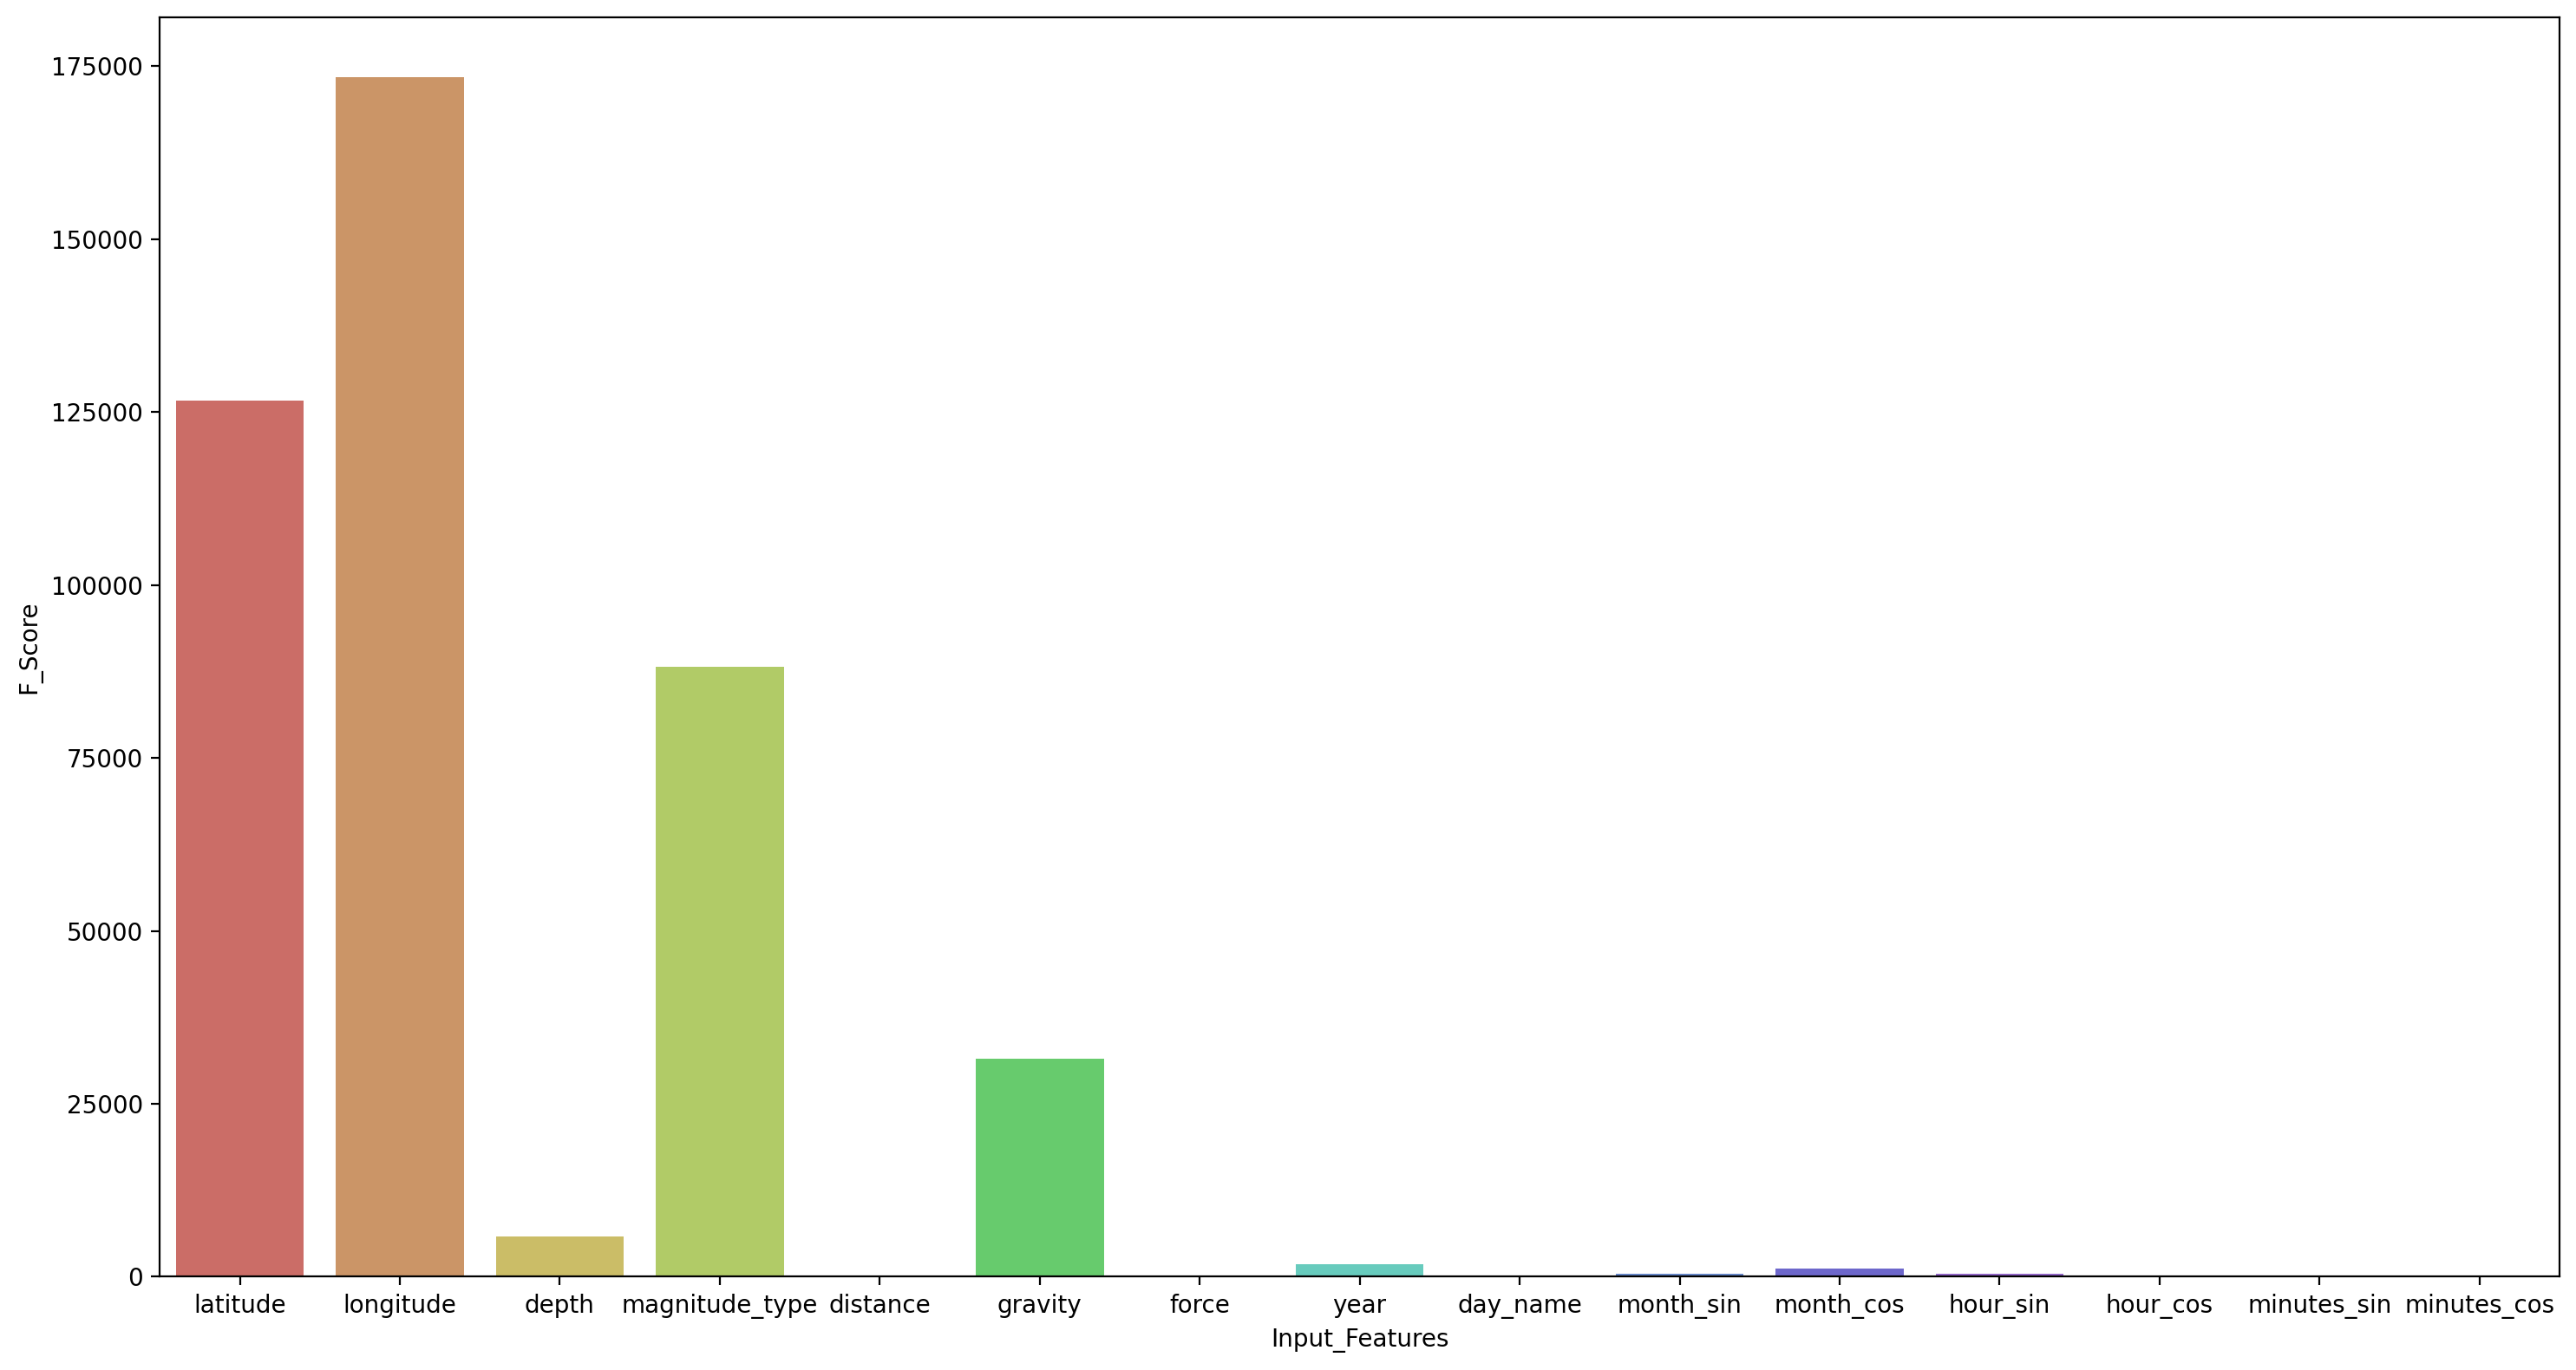

In [20]:
plt.figure(figsize=(15, 8), dpi = 200)
sns.barplot(x = feature_score['Input_Features'], 
            y = feature_score['F_Score'], 
            palette=sns.color_palette('hls', n_colors=len(feature_score)),
            hue=feature_score['Input_Features'])
plt.tight_layout()
plt.savefig(f'{image_path}/feature_selection_anova.png')
plt.show()

In [21]:
feature_score_df = feature_score.nlargest(10, columns="F_Score")

### On behalf of 4 different type of feature selection process. Following feature are selected for ML Model 
    - longitude,
    - latitude          
    - gravity        
    - depth  
    - magnitude_type 
    - year 
    - month_cos
    - month_sin
    - distance
    - force

In [23]:
selected_independent_feature = ['latitude', 
                                'longitude',
                                'depth',
                                'magnitude',
                                'magnitude_type',
                                'distance',
                                'gravity',
                                'force',
                                'year',
                                'month_sin',
                                'month_cos']